# Evaluation notebook

## Imports

In [41]:
import numpy as np
import os
import s323270
from sklearn.model_selection import train_test_split
from matplotlib.axes import Axes
from matplotlib import pyplot as plt

## Setup

In [ ]:
PROBLEM = 7
SEED = 42
TEST_SIZE = 0.2
function = eval(f"s323270.f{PROBLEM}")

## Data handling

In [ ]:
x = np.load(f"./data/problem_{PROBLEM}.npz")
print(f"Evaluating problem {PROBLEM}")
x['x'].shape, x['y'].shape

In [44]:
dataset_dim = x['x'].shape[0]
dataset_size = x['x'].shape[1]

In [ ]:
train_indices, val_indices = train_test_split(range(dataset_size), test_size=TEST_SIZE, random_state=42)
x_train, y_train = x['x'][:, train_indices], x['y'][train_indices]
x_val, y_val = x['x'][:, val_indices], x['y'][val_indices]

## Evaluation

### MSE on whole dataset

In [ ]:
print(f"MSE (overall): {100*np.square(x['y']-function(x['x'])).sum()/len(x['y']):g}")

### MSE on train and test split separately
Note the difference

In [ ]:
print(f"MSE (train): {100*np.square(y_train-function(x_train)).sum()/len(y_train):g}")
print(f"MSE (val) : {100*np.square(y_val-function(x_val)).sum()/len(y_val):g}")

## Plots

### Dataset and function predictions on single dimension

In [48]:
def plot_solution(features, labels, function, problem, i):
    
    domain = np.zeros((features.shape[0], 1000))
    domain[i] = np.linspace(features[i].min(), features[i].max(), 1000)
    predicted = function(domain)
    
    # First subplot: X1 vs Y and X1 vs R
    plt.scatter(features[i], labels, marker='o', s=2, color="r", label='Actual')
    plt.plot(domain[i], predicted, color="b", label='Predicted')
    plt.xlabel(f'X[{i}]')
    plt.ylabel('Y')
    plt.title(f"Problem {problem} - X{i}")
    plt.grid(True)
    plt.legend()

In [ ]:
features = x['x']
labels = x['y']

for i in range(features.shape[0]):
    plt.figure(figsize=(8,8))
    plot_solution(features, labels, function, PROBLEM, i)
    path = f"./results/problems/problem{PROBLEM}/x{i}.png"
    
    if os.path.exists(path):
        os.remove(path)
    
    plt.tight_layout()
    plt.savefig(path)

plt.show()

### 3D plot for 2D-domain datasets

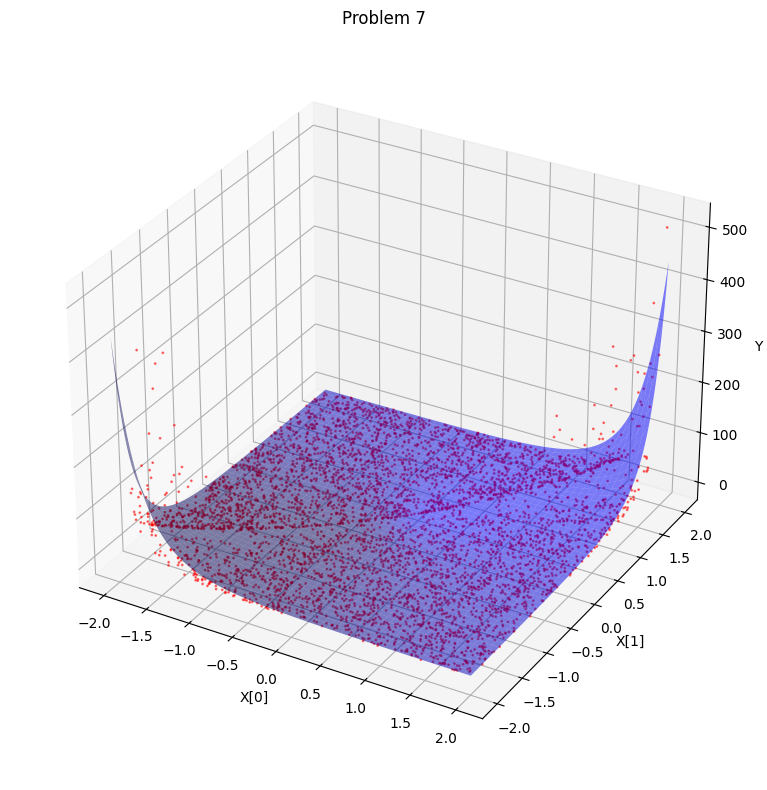

In [50]:
if features.shape[0] == 2:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    x0 = np.linspace(features[0].min(), features[0].max(), 1000)
    x1 = np.linspace(features[1].min(), features[1].max(), 1000)
    
    X0, X1 = np.meshgrid(x0, x1)
    grid = np.array([X0.ravel(), X1.ravel()])
    
    Y = function(grid).reshape(X0.shape)

    # Assuming features is a 2-dimensional numpy array
    ax.scatter(features[0], features[1], labels, c='r', s=1, alpha=0.5)
    ax.plot_surface(X0, X1, Y, color='b', alpha=0.5)

    ax.set_xlabel('X[0]')
    ax.set_ylabel('X[1]')
    ax.set_zlabel('Y') 
    ax.set_box_aspect(aspect=None, zoom=0.96)
    
    plt.title(f"Problem {PROBLEM}")
    
    path = f"./results/problems/problem{PROBLEM}/3d.png"
    
    if os.path.exists(path):
        os.remove(path)
    
    plt.tight_layout()
    plt.savefig(path)
    
    plt.show()